<a href="https://colab.research.google.com/github/saimathura/deeplearning-MDSC302/blob/main/22233_Basic_Convolutions_KMnist_MDSC_302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saimathurakrishnan","key":"93f1782054d1d824aebb7eace9b87a9b"}'}

In [ ]:
! mkdir ~/.kaggle


In [ ]:


! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           7770        252  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          17716        573  1.0              
joebeachcapital/students-performance                       Students Performance                             2KB  2023-08-31 00:50:11           2440         62  1.0              
iamsouravbanerjee/airline-dataset                          Airline Dataset                                  8M

In [ ]:
!kaggle competitions download -c Kannada-MNIST

 97% 12.0M/12.4M [00:01<00:00, 13.8MB/s]
100% 12.4M/12.4M [00:01<00:00, 7.56MB/s]


# creating a custom DAtaset class

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
! mkdir train

In [ ]:
! unzip Kannada-MNIST.zip -d train

Archive:  Kannada-MNIST.zip
  inflating: train/Dig-MNIST.csv     
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
import pandas as pd

In [ ]:

# class Kmnist(Dataset):
#     def __init__(self, df, transform=None, target_transform=None):
#         self.img_labels = df.iloc[:,0]
#         # self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join( self.img_labels.iloc[idx, 0])
#         image = read_image(df.drop(df.columns[0],axis=1).iloc[idx,:].values)
#         label = self.img_labels.iloc[idx, 0]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [ ]:

class Kmnist(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:,0]
        # self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.df = df

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        #img_path = os.path.join( self.img_labels.iloc[idx, 0])
        image = (self.df.iloc[idx,1:].values)
        image = torch.tensor(image)
        image = torch.reshape(image,(1,28,28))
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
t_data = pd.read_csv('/content/train/train.csv')

In [ ]:
train_data = Kmnist(t_data)

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_size = int(0.9 * (len(train_data)))

In [ ]:
val_size = len(train_data) - train_size

In [ ]:
train_set , val_set = random_split(train_data, [train_size, val_size])

In [ ]:
train_set.__len__()

54000

In [ ]:
val_set.__len__()


6000

In [ ]:
tt_data = pd.read_csv('/content/train/train.csv')

In [ ]:
test_data = Kmnist(tt_data)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_set,batch_size = 64,shuffle = True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle = True)

In [ ]:
train_features,train_labels = next(iter(train_dataloader))

In [ ]:
train_features.shape

torch.Size([64, 1, 28, 28])

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


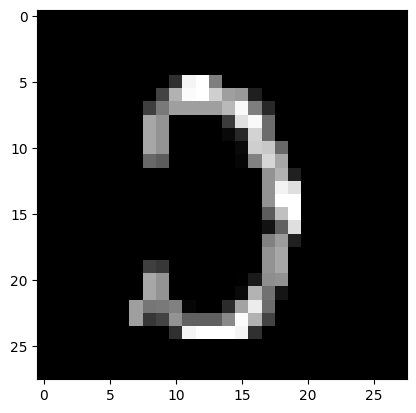

Label: 0


In [ ]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
from torch import nn

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
import torch.nn.functional as F

In [ ]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
        nn.Conv2d(1, 32, 5, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, 5, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )
        self.fc1 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(7*7*64, 1024),
        nn.Dropout(0.5),
        nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.conv1(x.float())
        x = self.conv2(x)
        return F.softmax(self.fc1(x),dim=1)



In [ ]:
model = net()# loading THe Model

In [ ]:
model.cuda()

net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1024, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [ ]:
device = torch.device("cuda:0")
model.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1024, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)

# using optimzer as Adam and the same  neural network from previous

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [ ]:
for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

Epoch [1/10],Train Accuracy: 0.0578, Val Accuracy: 0.6014, Train Loss: 1.9718, Val Loss: 1.8946
Epoch [2/10],Train Accuracy: 0.0916, Val Accuracy: 0.8246, Train Loss: 1.6872, Val Loss: 1.6851
Epoch [3/10],Train Accuracy: 0.1039, Val Accuracy: 0.9390, Train Loss: 1.5840, Val Loss: 1.5781
Epoch [4/10],Train Accuracy: 0.1056, Val Accuracy: 0.9371, Train Loss: 1.5698, Val Loss: 1.5798
Epoch [5/10],Train Accuracy: 0.1057, Val Accuracy: 0.9378, Train Loss: 1.5691, Val Loss: 1.5798
Epoch [6/10],Train Accuracy: 0.1058, Val Accuracy: 0.9427, Train Loss: 1.5680, Val Loss: 1.5749
Epoch [7/10],Train Accuracy: 0.1059, Val Accuracy: 0.9415, Train Loss: 1.5671, Val Loss: 1.5759
Epoch [8/10],Train Accuracy: 0.1060, Val Accuracy: 0.9420, Train Loss: 1.5661, Val Loss: 1.5758
Epoch [9/10],Train Accuracy: 0.1061, Val Accuracy: 0.9433, Train Loss: 1.5660, Val Loss: 1.5743
Epoch [10/10],Train Accuracy: 0.1060, Val Accuracy: 0.9424, Train Loss: 1.5667, Val Loss: 1.5751
Training finished


# we are getting a very high accuracy in validation set

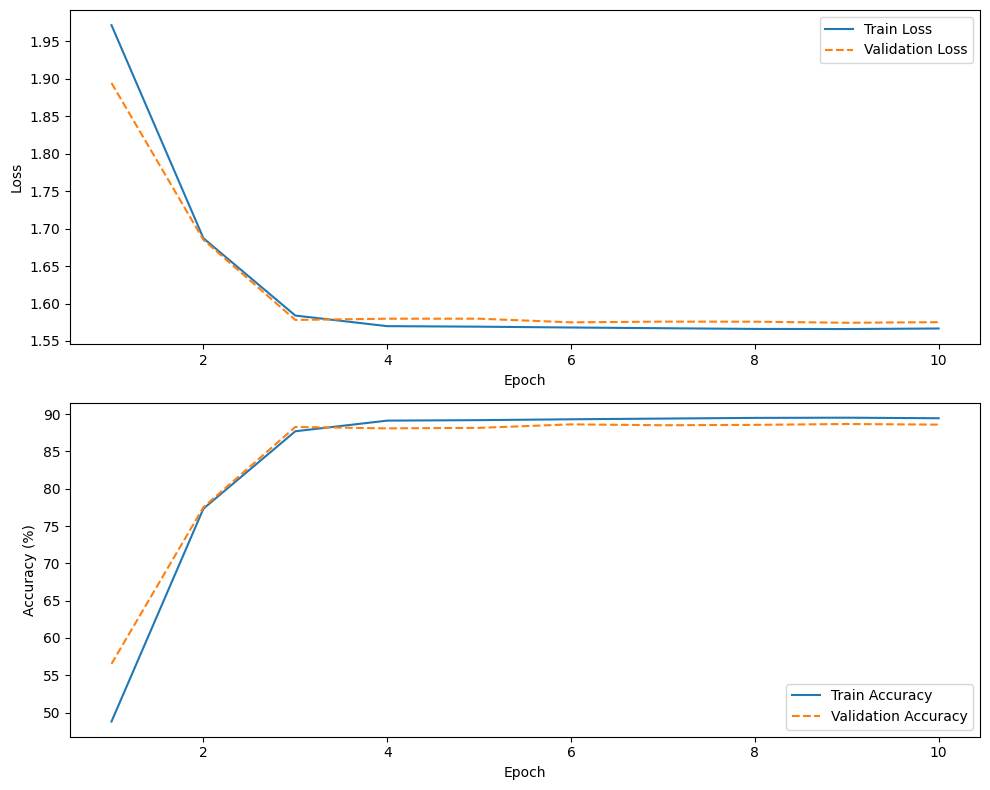

In [ ]:
# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# oh in test also we got around 99% accuracy

In [ ]:

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_labels).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 1.5661, Test Accuracy: 89.49%


# adding batch normalization to the model

In [ ]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
        nn.Conv2d(1, 32, 5, padding='same'),
        nn.BatchNorm2d(32),#added batch Norm
        nn.ReLU(),
        nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, 5, padding='same'),
        nn.BatchNorm2d(64),#added batch Norm
        nn.ReLU(),
        nn.MaxPool2d(2)
        )
        self.fc1 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(7*7*64, 1024),
        nn.Dropout(0.5),
        nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.conv1(x.float())
        x = self.conv2(x)
        return F.softmax(self.fc1(x),dim=1)



In [ ]:
model = net()# loading THe Model

In [ ]:
model.cuda()

net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1024, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [ ]:
device = torch.device("cuda:0")
model.to(device)

net(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1024, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)

# using optimzer as Adam and the same  neural network from previous

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [ ]:
for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

Epoch [1/10],Train Accuracy: 0.1097, Val Accuracy: 1.0433, Train Loss: 1.5444, Val Loss: 1.4823
Epoch [2/10],Train Accuracy: 0.1168, Val Accuracy: 1.0523, Train Loss: 1.4774, Val Loss: 1.4731
Epoch [3/10],Train Accuracy: 0.1172, Val Accuracy: 1.0528, Train Loss: 1.4728, Val Loss: 1.4721
Epoch [4/10],Train Accuracy: 0.1173, Val Accuracy: 1.0527, Train Loss: 1.4718, Val Loss: 1.4722
Epoch [5/10],Train Accuracy: 0.1176, Val Accuracy: 1.0550, Train Loss: 1.4697, Val Loss: 1.4700
Epoch [6/10],Train Accuracy: 0.1176, Val Accuracy: 1.0566, Train Loss: 1.4693, Val Loss: 1.4688
Epoch [7/10],Train Accuracy: 0.1176, Val Accuracy: 1.0560, Train Loss: 1.4686, Val Loss: 1.4690
Epoch [8/10],Train Accuracy: 0.1176, Val Accuracy: 1.0560, Train Loss: 1.4685, Val Loss: 1.4687
Epoch [9/10],Train Accuracy: 0.1178, Val Accuracy: 1.0534, Train Loss: 1.4675, Val Loss: 1.4709
Epoch [10/10],Train Accuracy: 0.1178, Val Accuracy: 1.0566, Train Loss: 1.4670, Val Loss: 1.4683
Training finished


#adding batch Normaliation and plotting that models curves

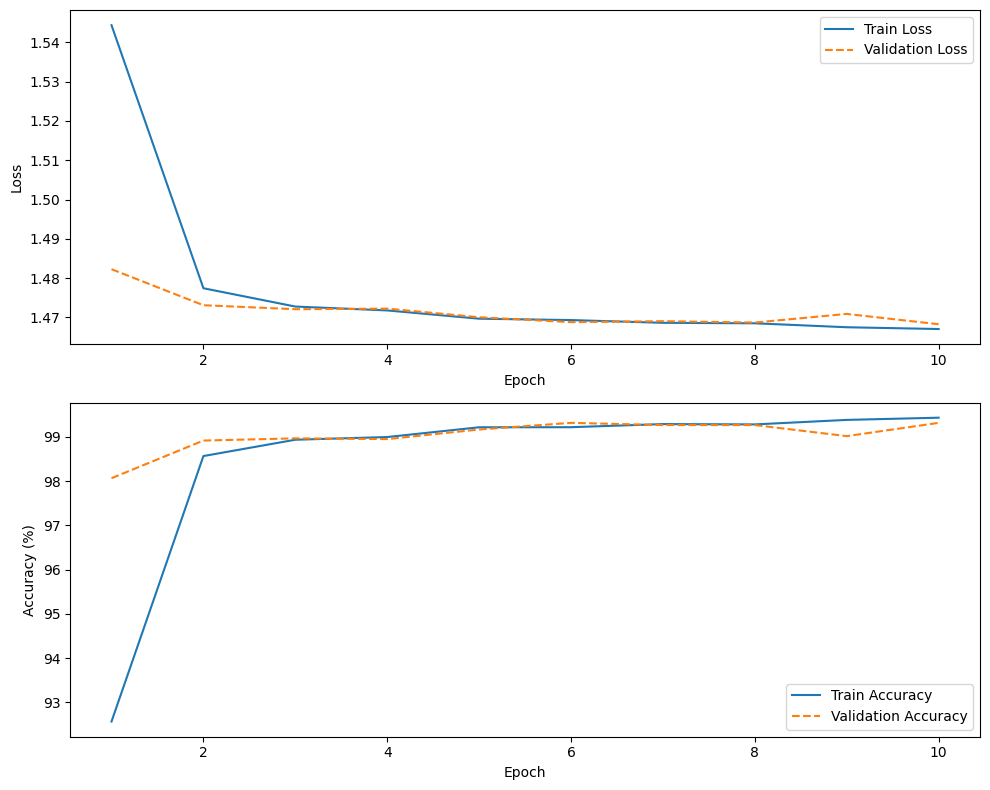

In [ ]:
# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# lets test the Model

In [ ]:

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_labels).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 1.4659, Test Accuracy: 99.53%
